***Flower - color , size of petal,shape of petal***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
# BMI Calculator
np.random.seed(50)
height = np.random.randint(140,200,300)
weight = np.random.randint(40,120,300)
bmi = weight/((height/100)**2)


In [3]:
def category(bmi):
    bmi = float(bmi)
    if bmi <= 19 and bmi >1:
        return 'under weight'
    elif bmi <= 25 and bmi>19:
        return 'normal'
    else:
        return 'over weight'

category = np.array([category(b) for b in bmi] )
BMI=pd.DataFrame({'Height':height,'Weight':weight,'BMI':bmi,'category':category})
BMI

# BMI["category"] = BMI['BMI'].apply(category)

,Height,Weight,BMI,category
0,197,87,22.417480,normal
1,178,116,36.611539,over weight
2,168,45,15.943878,under weight
3,197,48,12.368265,under weight
4,168,78,27.636054,over weight
...,...,...,...,...
195,158,50,20.028842,normal
196,147,77,35.633301,over weight
197,199,114,28.787152,over weight
198,183,116,34.638239,over weight


In [4]:
L_C = LabelEncoder()
BMI['category'] = L_C.fit_transform(BMI['category'])


In [5]:
X = BMI[['Height','Weight']]
Y = BMI['category']

In [6]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=50)

In [7]:
print(X_train,X_test,Y_train,Y_test)

     Height  Weight
114     167      74
187     157      57
76      155      93
122     182      78
142     177     109
..      ...     ...
132     173     107
33      144      45
109     163      70
139     162      46
176     149      41

[140 rows x 2 columns]      Height  Weight
112     164      43
165     196      99
12      142      76
73      191     112
144     146      62
20      195      77
199     195      65
8       156      63
39      161     115
88      167      99
81      183      84
197     199     114
69      182      91
160     166      40
25      162      99
99      151      59
151     171     103
23      173      78
138     153      61
159     186      76
89      165     106
82      190      73
24      172      84
174     179      83
137     184     104
83      147      65
107     166      65
34      141      61
97      161     115
167     145      80
123     144     102
157     167      60
75      142      56
152     196      71
117     141     100
149     189     

In [8]:
model = KNeighborsClassifier(n_neighbors=4)
model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=4)

In [27]:
# def predictBMI(data,model,L_C):
#     p=model.predict(data)
#     p_c=L_C.inverse_transform(p)[0]
#     return p_c

# user_H = float(input("Enter your Height in cm: "))
# user_W = float(input("Enter your Weight in kg: "))

# input_data = np.array([['height','weight']])
# predicted_category = predictBMI(input_data,model,L_C)

# D,I=model.kneighbors(input_data,n_neighbors=4)
# print(f"Distance = {D}")


def predictBMI(data, model, L_C):
    p = model.predict(data)
    p_c = L_C.inverse_transform(p)[0]
    return p_c

# Get user input and convert to float
user_H = float(input("Enter your Height in cm: "))
user_W = float(input("Enter your Weight in kg: "))

# Create input data as a 2D array
input_data = np.array([[user_H, user_W]])

# Predict BMI category
predicted_category = predictBMI(input_data, model, L_C)
print(f"Predicted Category: {predicted_category}")

# Find the k-nearest neighbors
D, I = model.kneighbors(input_data, n_neighbors=4)
print(f"Distances = {D}")
print(f"Indices = {I}")




Enter your Height in cm:  180
Enter your Weight in kg:  67


Predicted Category: normal
Distances = [[0.         3.16227766 4.         5.        ]]
Indices = [[110  72 125  88]]


C:\Users\dhruv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\dhruv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


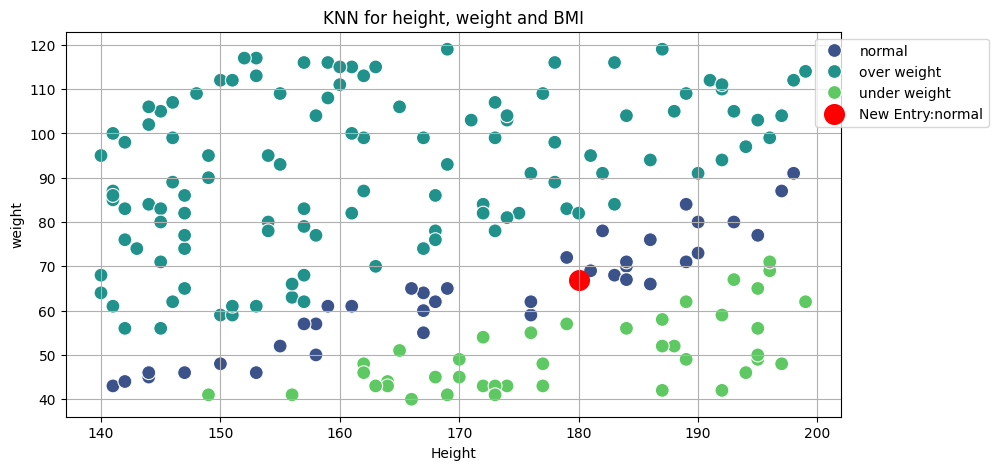

Height:180.0 | weight:67.0 | predicted category: normal


In [30]:



plt.figure(figsize=(10,5))
#training data plot
sns.scatterplot(data=X,x=height,y=weight,hue=L_C.inverse_transform(Y),palette = 'viridis',s=100)
#input data plot
plt.scatter(input_data[0,0],input_data[0,1],color='red',s=200,label=f'New Entry:{predicted_category}')
plt.title("KNN for height, weight and BMI")
plt.xlabel("Height")
plt.ylabel("weight")
plt.legend(loc= "upper right",bbox_to_anchor=(1,0.2,0.2,0.8))
plt.grid(True)
plt.show()
print(f"Height:{user_H} | weight:{user_W} | predicted category: {predicted_category}")